In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/bootcamp/Averiguacao Cadastral/

/content/drive/MyDrive/bootcamp/Averiguacao Cadastral


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
# Load the datasets
df_familia_pessoa = pd.read_csv('bases/df_fam_pessoas_amostra_100mil.csv', sep=',')
df_familia_pessoas_tratado = pd.read_csv('base_pre/df_var_caracterisca_pessoas.csv')
df_familia_pessoas_final = df_familia_pessoa.merge(df_familia_pessoas_tratado, on='id_familia', how='left')
df_familia_pessoas_final = df_familia_pessoas_final.sample(10000)

In [13]:
import numpy as np
df_familia_pessoas_final['ind_parc_mds_fam'] = np.where(df_familia_pessoas_final['ind_parc_mds_fam'] != 0, 1, 0)

In [14]:
df_familia_pessoas_final = df_familia_pessoas_final[['dias_cadastramento', 'dias_atualizacao','cod_familia_indigena_fam',
                                                     'ind_familia_quilombola_fam','qtde_pessoas',
                                                     'pct_mulheres','pct_homens',
                                                     'pct_1_infancia','pct_crianca_adolescente','pct_crianca_adulto',
                                                     'pct_idosos','pct_deficientes',
                                                     'qtd_mulheres','qtd_homens',
                                                     'qtd_1_infancia','qtd_crianca_adolescente','qtd_crianca_adulto',
                                                     'qtd_idosos','qtd_deficientes',
                                                     'tem_mulher','tem_homem',
                                                     'tem_1_infancia','tem_crianca_adolescente','tem_crianca_adulto',
                                                     'tem_idoso','tem_deficiente',
                                                     'ind_parc_mds_fam', 'classe_renda']]

In [15]:
# Selecionando as variáveis que serão utilizadas para o modelo
X = df_familia_pessoas_final.drop('classe_renda', axis=1)

y = df_familia_pessoas_final['classe_renda']

# Exibindo as informações de X
print('X =', X.shape)
X.head()

X = (10000, 27)


,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,pct_mulheres,pct_homens,pct_1_infancia,pct_crianca_adolescente,pct_crianca_adulto,...,qtd_idosos,qtd_deficientes,tem_mulher,tem_homem,tem_1_infancia,tem_crianca_adolescente,tem_crianca_adulto,tem_idoso,tem_deficiente,ind_parc_mds_fam
153009,2670.0,357,2.0,2.0,2,0.500000,0.500000,0.000000,0.000000,1.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0
111194,1615.0,487,2.0,2.0,4,0.500000,0.500000,0.000000,0.250000,0.750000,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
199927,96.0,96,2.0,2.0,2,0.500000,0.500000,0.000000,0.000000,0.500000,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0
212449,1043.0,763,2.0,2.0,3,0.333333,0.666667,0.333333,0.333333,0.333333,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0
59556,2141.0,314,2.0,2.0,5,0.200000,0.800000,0.400000,0.200000,0.400000,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0


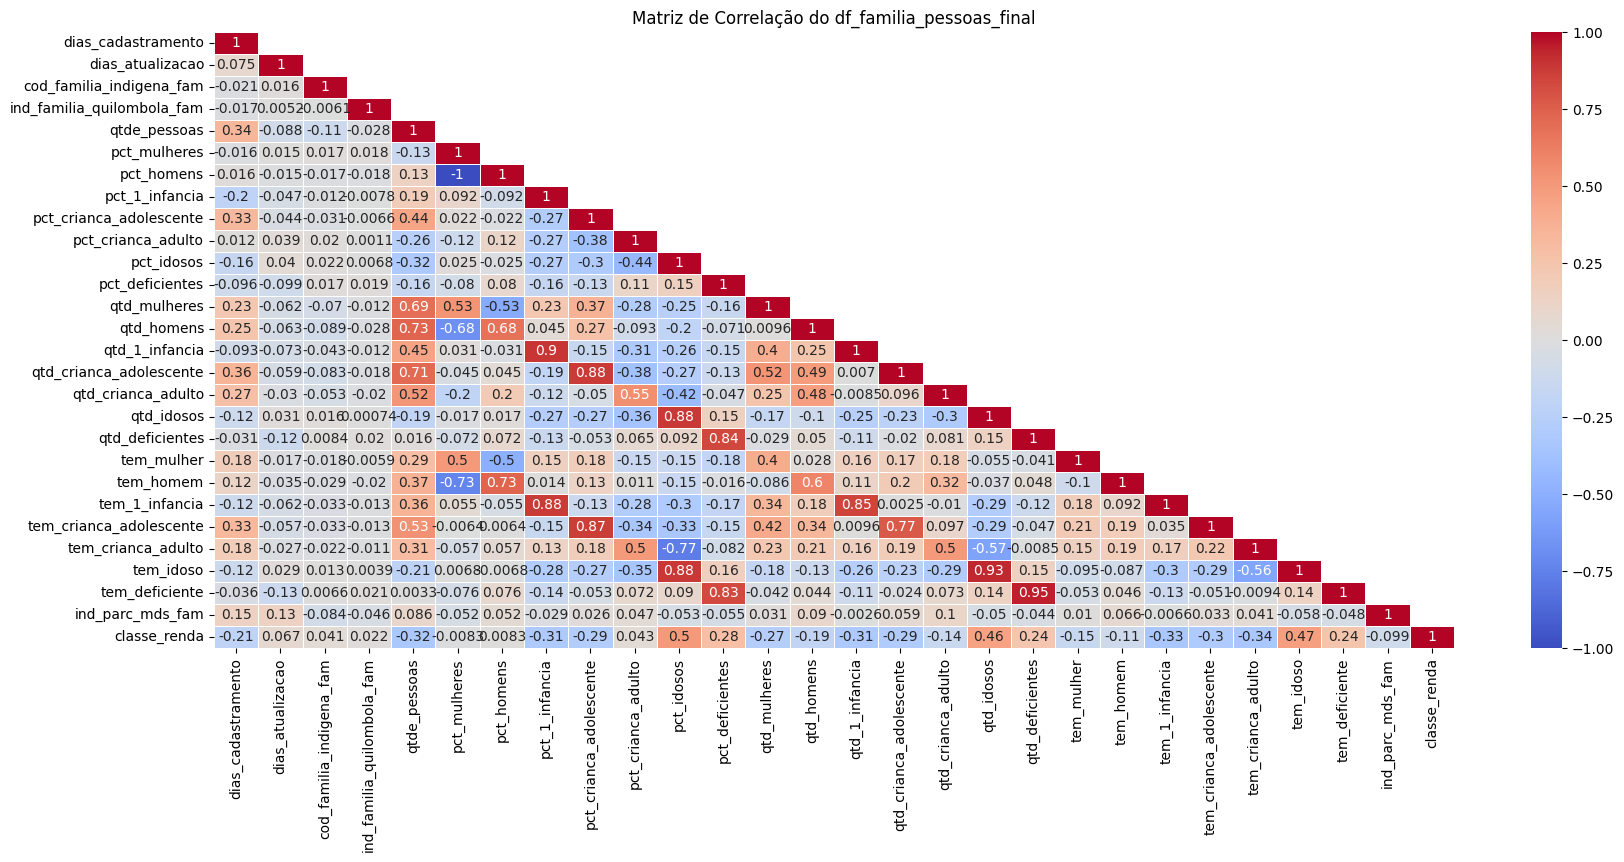

In [17]:
# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Calculando a matriz de correlação
correlation_matrix = df_familia_pessoas_final.corr()

# Máscara para a parte superior da matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plotando o gráfico de correlações com a máscara
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação do df_familia_pessoas_final')
plt.show()

In [18]:
X = X.drop(['qtd_1_infancia','qtd_crianca_adolescente','qtd_idosos','qtd_deficientes','tem_1_infancia','tem_crianca_adolescente','tem_deficiente'], axis=1)

In [19]:
X.head()

,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,pct_mulheres,pct_homens,pct_1_infancia,pct_crianca_adolescente,pct_crianca_adulto,pct_idosos,pct_deficientes,qtd_mulheres,qtd_homens,qtd_crianca_adulto,tem_mulher,tem_homem,tem_crianca_adulto,tem_idoso,ind_parc_mds_fam
153009,2670.0,357,2.0,2.0,2,0.500000,0.500000,0.000000,0.000000,1.000000,0.0,0.00,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0
111194,1615.0,487,2.0,2.0,4,0.500000,0.500000,0.000000,0.250000,0.750000,0.0,0.25,2.0,2.0,3.0,1.0,1.0,1.0,0.0,0
199927,96.0,96,2.0,2.0,2,0.500000,0.500000,0.000000,0.000000,0.500000,0.5,0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
212449,1043.0,763,2.0,2.0,3,0.333333,0.666667,0.333333,0.333333,0.333333,0.0,0.00,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0
59556,2141.0,314,2.0,2.0,5,0.200000,0.800000,0.400000,0.200000,0.400000,0.0,0.00,1.0,4.0,2.0,1.0,1.0,1.0,0.0,0


In [20]:
y.describe()

,classe_renda
count,10000.000000
mean,0.495200
std,0.715701
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [21]:
y.value_counts()

,count
classe_renda,
0.0,6359
1.0,2330
2.0,1311


In [22]:
y.isnull().sum()

0

In [23]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
y_train.describe()

,classe_renda
count,8000.000000
mean,0.495250
std,0.715745
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [25]:
# Mapeando y_train e y_test se necessário (exemplo)
y_train_mapped = y_train.astype('int')
y_test_mapped = y_test.astype('int')

In [26]:
y_train_mapped.describe()

,classe_renda
count,8000.000000
mean,0.495250
std,0.715745
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


# Fazendo um pipeline comparando diversos modelos

In [27]:
!pip install xgboost -q

In [28]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [29]:
# Importações necessárias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Definição dos Modelos

In [30]:
# Definir os modelos e os parâmetros
models = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}

# 2. Treinamento e Busca de Hiperparâmetros

In [31]:
# Criar um dicionário para armazenar os melhores modelos
best_models = {}

for model_name, model_info in models.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train_mapped)

    # Armazenar o melhor modelo
    best_models[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name}: {grid_search.best_params_}")

Melhores hiperparâmetros para DecisionTree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Melhores hiperparâmetros para RandomForest: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 250}
Melhores hiperparâmetros para CatBoost: {'classifier__depth': 5, 'classifier__iterations': 250, 'classifier__learning_rate': 0.1}


# 3. Avaliação do Modelo

In [32]:
from sklearn.metrics import accuracy_score, f1_score

In [33]:
# Avaliar todos os modelos
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Exibir os resultados
    print(f"Modelo: {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo: DecisionTree
  F1 Score: 0.58
  Acurácia: 0.72
Modelo: RandomForest
  F1 Score: 0.59
  Acurácia: 0.71
Modelo: XGBoost
  F1 Score: 0.60
  Acurácia: 0.73
Modelo: CatBoost
  F1 Score: 0.59
  Acurácia: 0.72


# 4. Geração de Matriz de Confusão

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

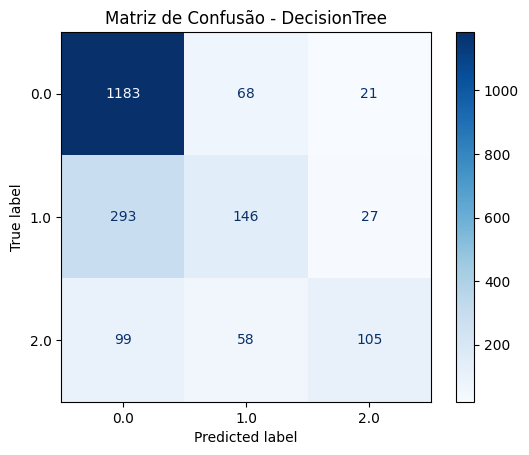

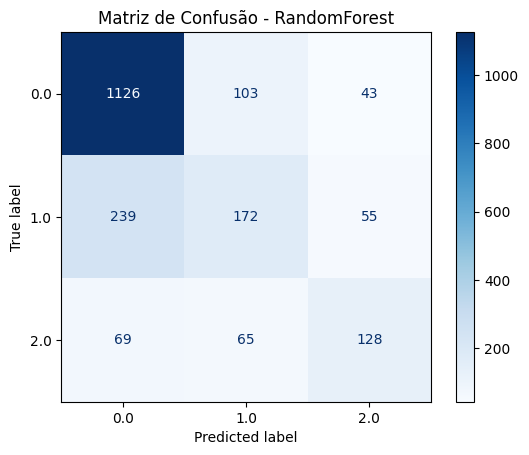

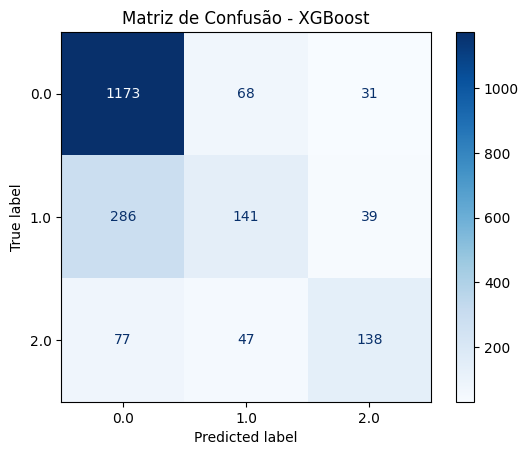

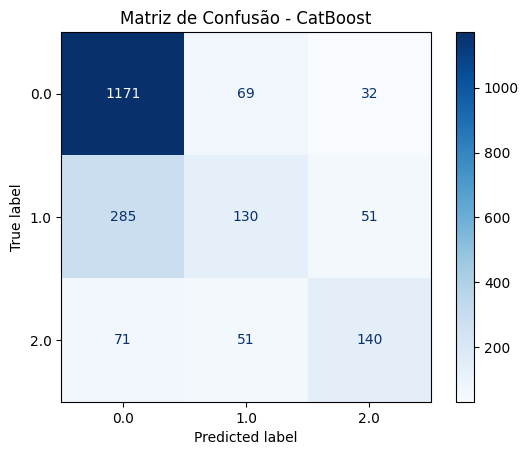

In [35]:
# Gerar matriz de confusão para cada modelo
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

# 5. Análise da Importância das Features

In [36]:
import numpy as np
from sklearn.inspection import permutation_importance

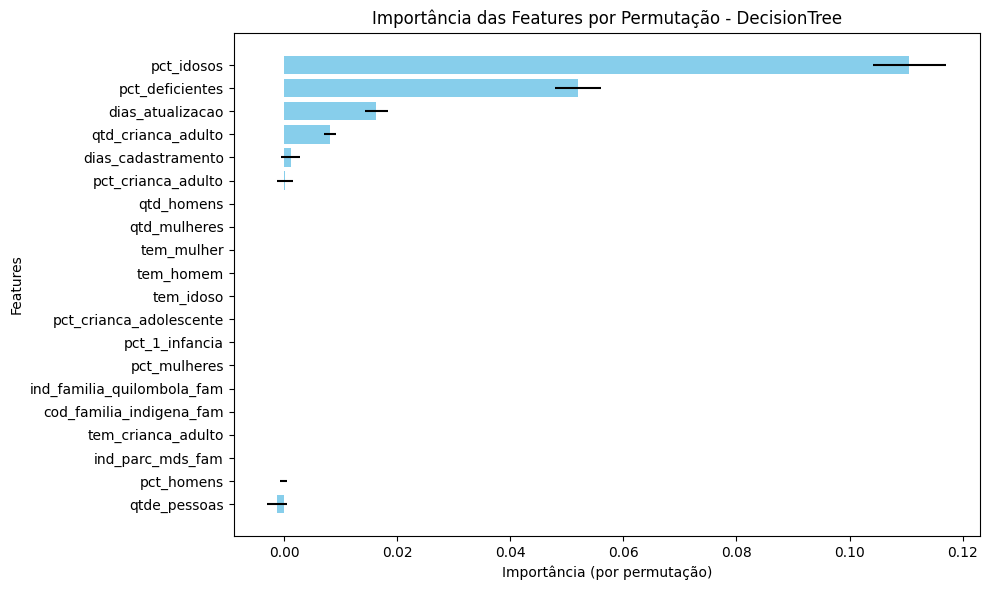

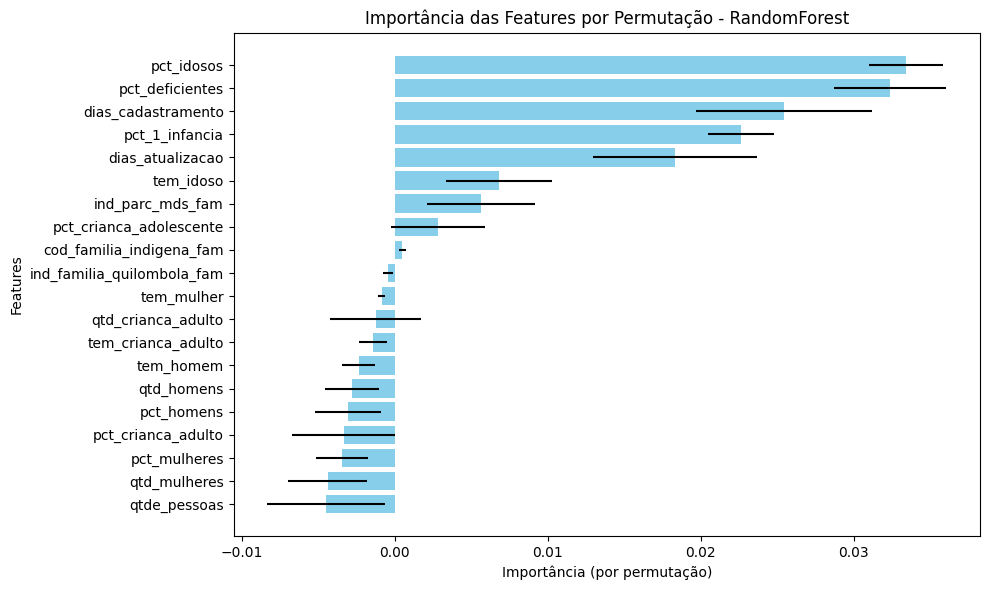

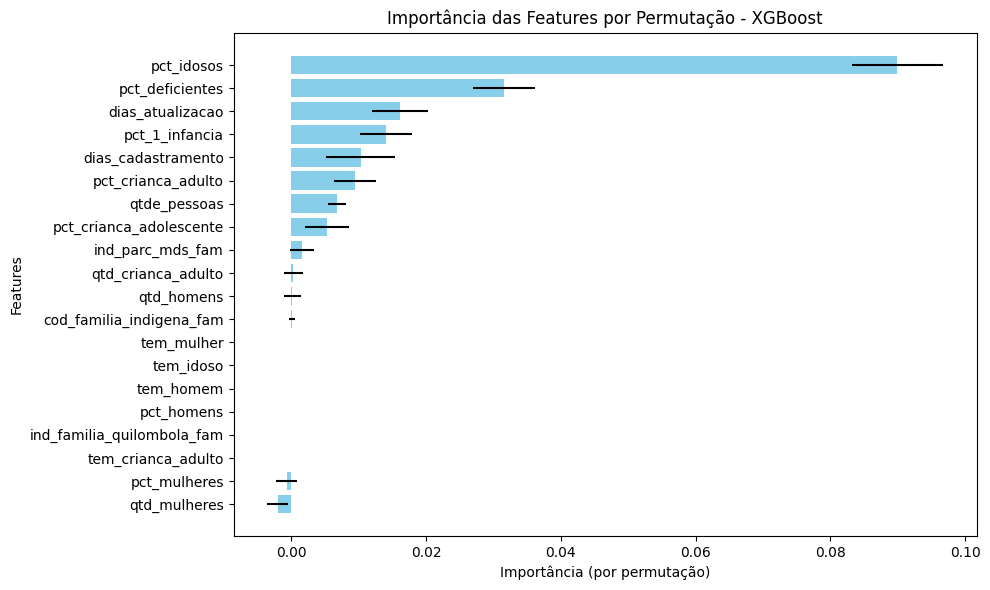

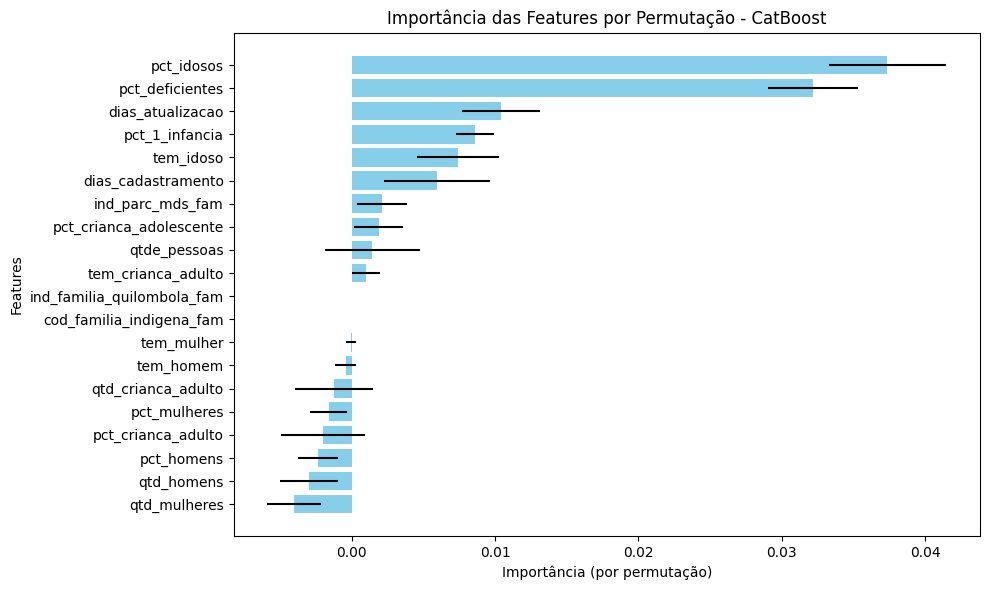

In [37]:
# Importância das features para cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name}")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

In [38]:
# Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo
for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:10]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name}:")
    print(top_features_df)


5 Features mais importantes para o modelo DecisionTree:
              Feature  Importância
0          pct_idosos      0.11060
1     pct_deficientes      0.05195
2    dias_atualizacao      0.01630
3  qtd_crianca_adulto      0.00810
4  dias_cadastramento      0.00115
5  pct_crianca_adulto      0.00020
6          qtd_homens      0.00000
7        qtd_mulheres      0.00000
8          tem_mulher      0.00000
9           tem_homem      0.00000

5 Features mais importantes para o modelo RandomForest:
                      Feature  Importância
0                  pct_idosos      0.03345
1             pct_deficientes      0.03240
2          dias_cadastramento      0.02545
3              pct_1_infancia      0.02265
4            dias_atualizacao      0.01830
5                   tem_idoso      0.00680
6            ind_parc_mds_fam      0.00565
7     pct_crianca_adolescente      0.00280
8    cod_familia_indigena_fam      0.00050
9  ind_familia_quilombola_fam     -0.00045

5 Features mais importantes

# Avaliando o balanceamento das classes

In [39]:
# Verificar a distribuição da variável target
target_distribution = y.value_counts(normalize=True)

In [40]:
print("Distribuição da variável target 'classe_renda':")
print(target_distribution)

Distribuição da variável target 'classe_renda':
classe_renda
0.0    0.6359
1.0    0.2330
2.0    0.1311
Name: proportion, dtype: float64


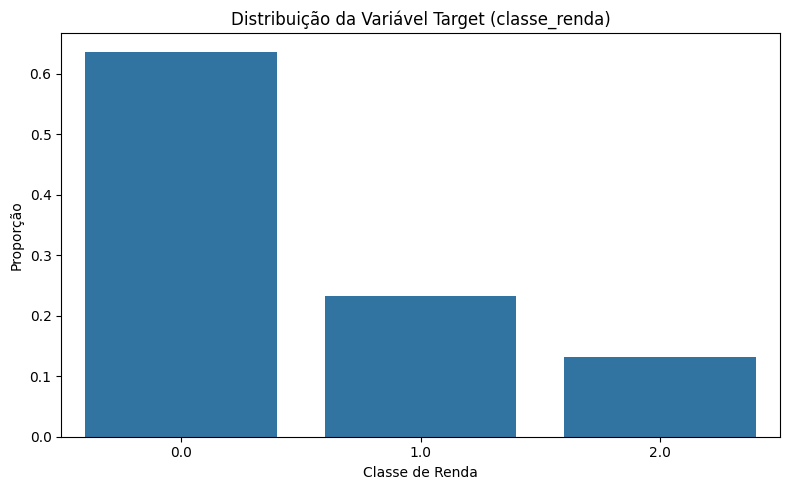

In [41]:
# Plotar a distribuição da variável target
plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda)')
plt.xlabel('Classe de Renda')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [42]:
# Exibir o número absoluto de ocorrências por classe
absolute_distribution = y.value_counts()

print("\nNúmero absoluto de ocorrências por classe:")
print(absolute_distribution)


Número absoluto de ocorrências por classe:
classe_renda
0.0    6359
1.0    2330
2.0    1311
Name: count, dtype: int64


## Balanceando as classes

In [43]:
pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [45]:
df_familia_pessoas_final.classe_renda.value_counts()

,count
classe_renda,
0.0,6359
1.0,2330
2.0,1311


In [46]:
y.value_counts()

,count
classe_renda,
0.0,6359
1.0,2330
2.0,1311


In [47]:
# Suponha que 'y' seja sua variável alvo e '0.0' seja a classe majoritária
n_samples_majority = y.value_counts()[0.0]

# Oversampling da classe '1.0' para 30% da classe majoritária
n_samples_1 = int(0.9 * n_samples_majority)

# Oversampling da classe '2.0' para 40% da classe majoritária
n_samples_2 = int(0.9 * n_samples_majority)

# Undersampling da classe '0.0' para 70% do tamanho original
n_samples_0 = int(1.0 * n_samples_majority)

over = SMOTE(sampling_strategy={1.0: n_samples_1, 2.0: n_samples_2})
under = RandomUnderSampler(sampling_strategy={0.0: n_samples_0})

In [48]:
# Criar um pipeline que aplica SMOTE e depois o undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

In [49]:
# Aplicar o balanceamento ao conjunto de dados
X_balanced, y_balanced = pipeline.fit_resample(X, y)

In [50]:
# Verificar a nova distribuição das classes
balanced_distribution = pd.Series(y_balanced).value_counts()

print("Distribuição da variável target 'classe_renda' após o balanceamento:")
print(balanced_distribution)

Distribuição da variável target 'classe_renda' após o balanceamento:
classe_renda
0.0    6359
1.0    5723
2.0    5723
Name: count, dtype: int64


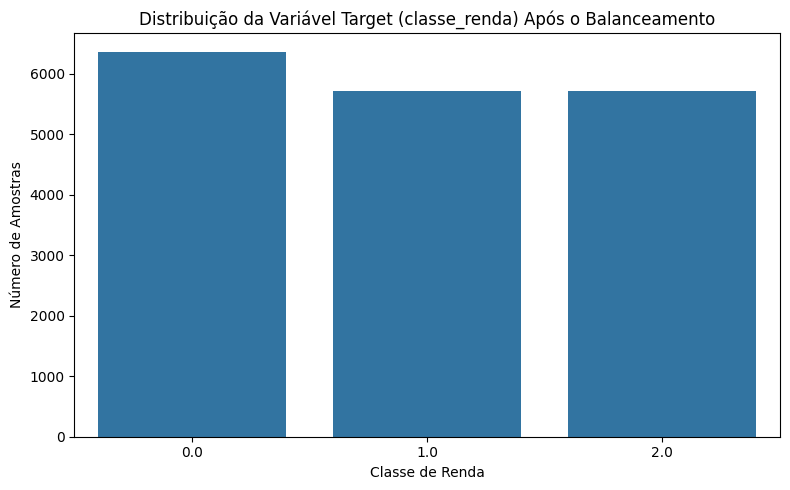

In [51]:
# Visualizar a distribuição das classes após o balanceamento
plt.figure(figsize=(8, 5))
sns.barplot(x=balanced_distribution.index, y=balanced_distribution.values)
plt.title('Distribuição da Variável Target (classe_renda) Após o Balanceamento')
plt.xlabel('Classe de Renda')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Refazendo as análises dos modelos após balanceamento das classes

In [52]:
X_balanced.head()

,dias_cadastramento,dias_atualizacao,cod_familia_indigena_fam,ind_familia_quilombola_fam,qtde_pessoas,pct_mulheres,pct_homens,pct_1_infancia,pct_crianca_adolescente,pct_crianca_adulto,pct_idosos,pct_deficientes,qtd_mulheres,qtd_homens,qtd_crianca_adulto,tem_mulher,tem_homem,tem_crianca_adulto,tem_idoso,ind_parc_mds_fam
91,6032.0,557,2.0,2.0,2,0.500000,0.500000,0.00,0.500000,0.500000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0
6452,1596.0,774,2.0,2.0,4,0.750000,0.250000,0.25,0.250000,0.500000,0.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,0
2544,4552.0,110,2.0,2.0,4,0.750000,0.250000,0.00,0.500000,0.500000,0.0,0.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,0
3357,2019.0,308,2.0,2.0,3,0.666667,0.333333,0.00,0.666667,0.333333,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0
967,2821.0,122,2.0,2.0,4,0.750000,0.250000,0.75,0.000000,0.250000,0.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0


In [53]:
print(X_balanced.shape)
print(y_balanced.shape)

(17805, 20)
(17805,)


In [54]:
print(y_balanced.shape)
print(y.shape)  # Verifique se y é igual a y_balanced

(17805,)
(10000,)


In [55]:
# Dividir os dados em treino e teste após balanceamento
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [56]:
# Definir os modelos e os parâmetros
models_balanced = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(objective='multi:softmax', num_class=3, random_state=42),
        'param_grid': {
            'classifier__n_estimators': [250, 300],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostClassifier(silent=True),
        'param_grid': {
            'classifier__iterations': [250, 500],
            'classifier__depth': [3, 5],
            'classifier__learning_rate': [0.1]
        }
    }
}



In [57]:
# Parte 3: Criar um dicionário para armazenar os melhores modelos
best_models_balanced = {}

for model_name, model_info in models_balanced.items():
    # Criar o pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_info['model'])
    ])

    # Definir GridSearchCV usando as features e classes balanceadas
    grid_search = GridSearchCV(pipeline, model_info['param_grid'], cv=3, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_balanced_train, y_balanced_train)  # Usando dados balanceados

    # Armazenar o melhor modelo
    best_models_balanced[model_name] = grid_search.best_estimator_
    print(f"Melhores hiperparâmetros para {model_name} (usando dados balanceados): {grid_search.best_params_}")



Melhores hiperparâmetros para DecisionTree (usando dados balanceados): {'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Melhores hiperparâmetros para RandomForest (usando dados balanceados): {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Melhores hiperparâmetros para XGBoost (usando dados balanceados): {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 300}
Melhores hiperparâmetros para CatBoost (usando dados balanceados): {'classifier__depth': 5, 'classifier__iterations': 500, 'classifier__learning_rate': 0.1}


In [58]:
# Parte 4: Avaliar todos os modelos usando dados balanceados
from sklearn.metrics import f1_score, accuracy_score
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usando dados de teste balanceados

    # Calcular F1 Score
    f1 = f1_score(y_balanced_test, y_pred, average='macro')

    # Calcular Acurácia
    accuracy = accuracy_score(y_balanced_test, y_pred)

    # Exibir os resultados
    print(f"Modelo (usando dados balanceados): {model_name}")
    print(f"  F1 Score: {f1:.2f}")
    print(f"  Acurácia: {accuracy:.2f}")


Modelo (usando dados balanceados): DecisionTree
  F1 Score: 0.70
  Acurácia: 0.71
Modelo (usando dados balanceados): RandomForest
  F1 Score: 0.79
  Acurácia: 0.79
Modelo (usando dados balanceados): XGBoost
  F1 Score: 0.80
  Acurácia: 0.80
Modelo (usando dados balanceados): CatBoost
  F1 Score: 0.77
  Acurácia: 0.78


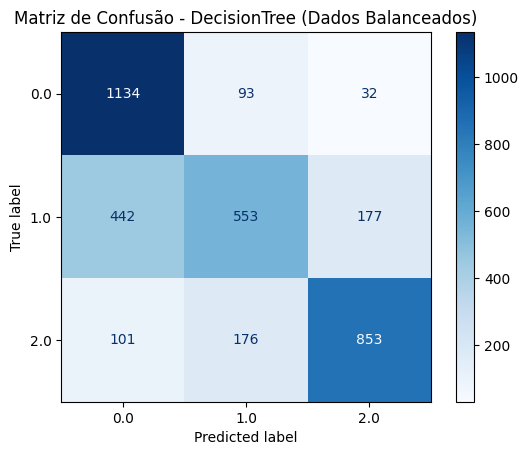

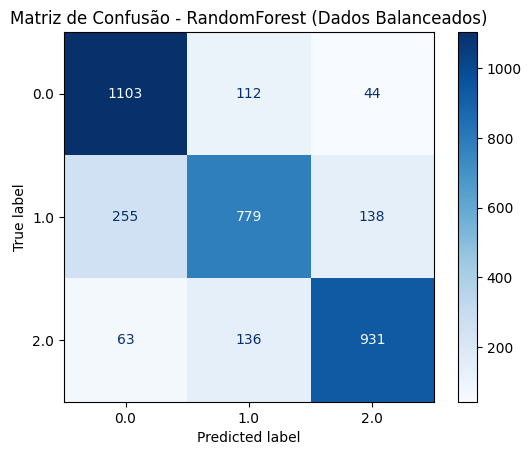

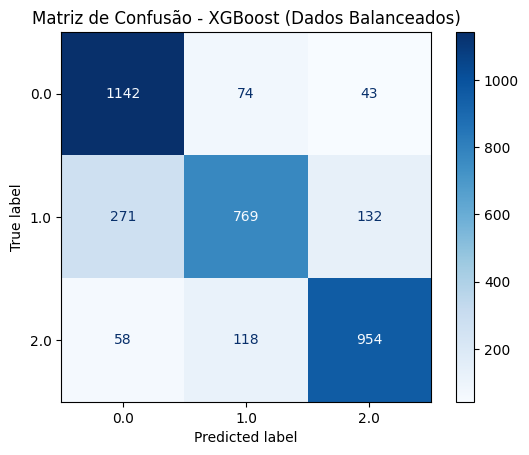

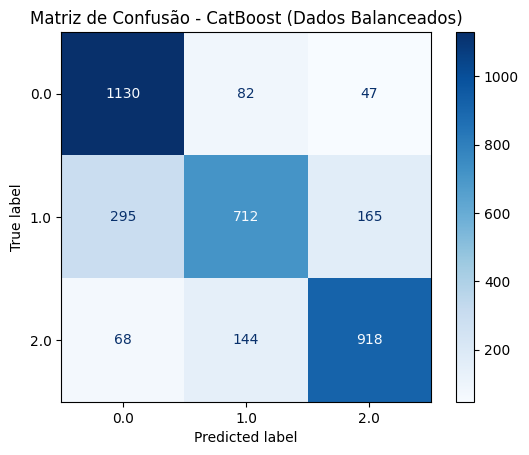

In [59]:
# Parte 5: Gerar matriz de confusão para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    y_pred = model.predict(X_balanced_test)  # Usar os dados de teste balanceados

    # Gerar a matriz de confusão
    ConfusionMatrixDisplay.from_estimator(model, X_balanced_test, y_balanced_test, cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name} (Dados Balanceados)')
    plt.show()

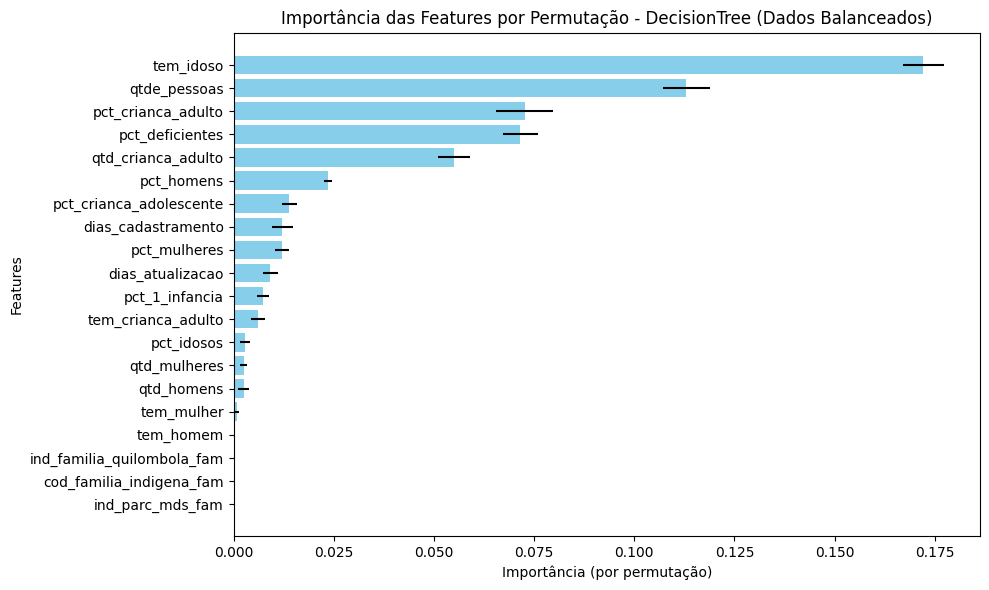

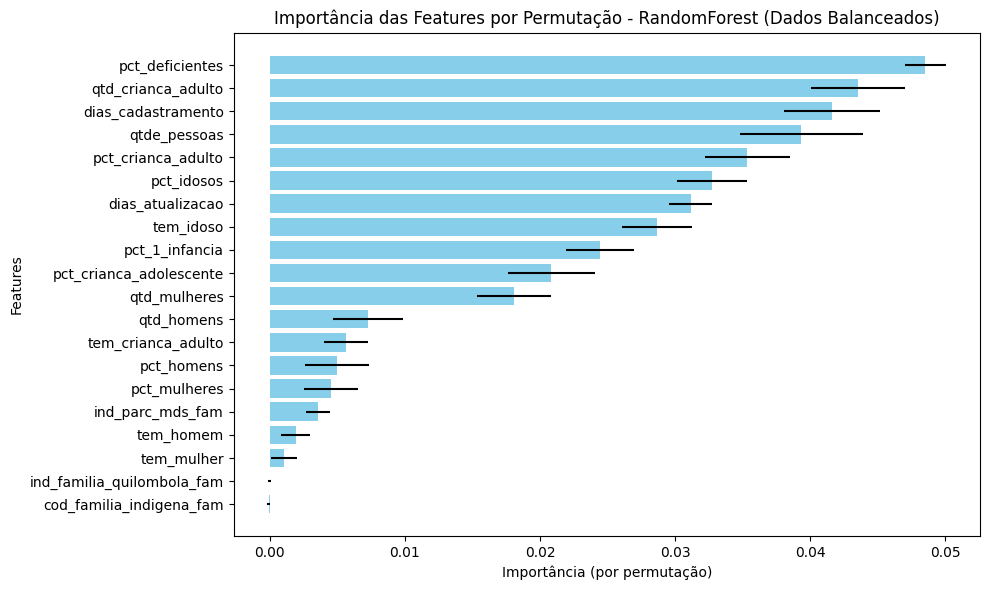

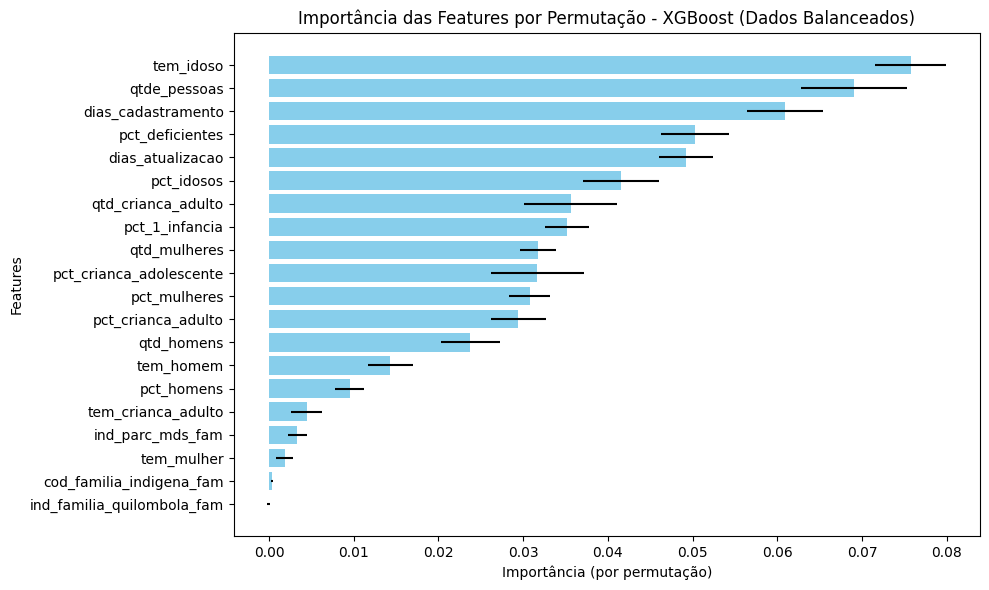

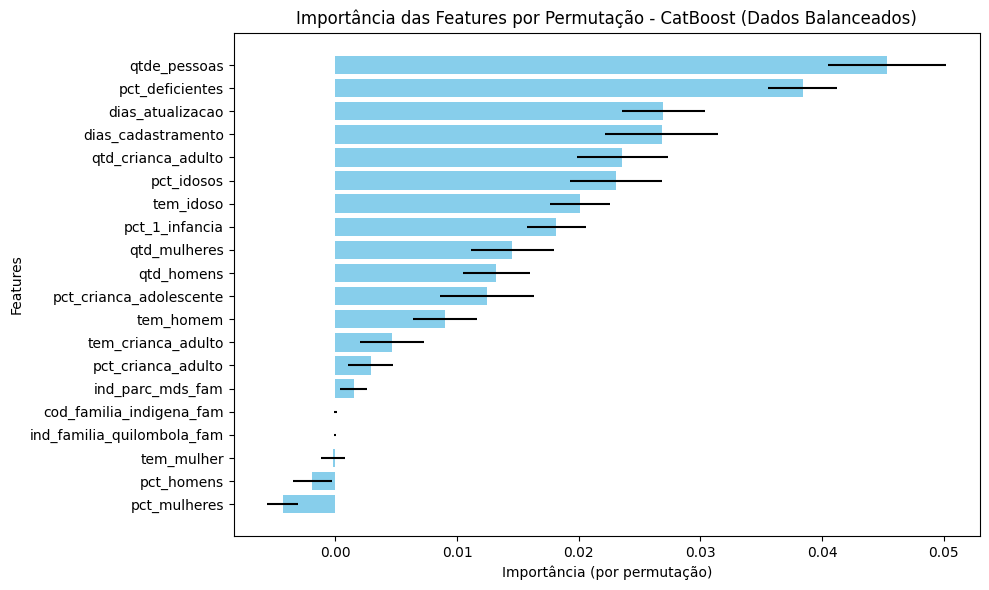

In [60]:
# Parte 6: Importância das features para cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Ordenar importâncias
    importance_vals = perm_importance.importances_mean
    importance_std = perm_importance.importances_std
    indices = np.argsort(importance_vals)[::-1]

    # Plotar
    plt.figure(figsize=(10, 6))
    plt.title(f"Importância das Features por Permutação - {model_name} (Dados Balanceados)")
    plt.barh(range(len(importance_vals)), importance_vals[indices], xerr=importance_std[indices], align="center", color='skyblue')
    plt.yticks(range(len(importance_vals)), X_balanced_test.columns[indices])
    plt.gca().invert_yaxis()
    plt.xlabel('Importância (por permutação)')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()



In [61]:
# Parte 7: Lista para armazenar as 5 principais features de cada modelo
top_features_list = {}

# Obter as 5 features mais importantes de cada modelo usando dados balanceados
for model_name, model in best_models_balanced.items():
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair valores de importância e índices
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Obter as 5 principais features e suas importâncias
    top_indices = indices[:10]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Armazenar em um DataFrame
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Adicionar ao dicionário
    top_features_list[model_name] = top_features_df

# Exibir as 5 principais features de cada modelo
for model_name, top_features_df in top_features_list.items():
    print(f"\n5 Features mais importantes para o modelo {model_name} (Dados Balanceados):")
    print(top_features_df)



5 Features mais importantes para o modelo DecisionTree (Dados Balanceados):
                   Feature  Importância
0                tem_idoso     0.172171
1             qtde_pessoas     0.113030
2       pct_crianca_adulto     0.072704
3          pct_deficientes     0.071581
4       qtd_crianca_adulto     0.055013
5               pct_homens     0.023673
6  pct_crianca_adolescente     0.013901
7       dias_cadastramento     0.012188
8             pct_mulheres     0.012075
9         dias_atualizacao     0.009155

5 Features mais importantes para o modelo RandomForest (Dados Balanceados):
                   Feature  Importância
0          pct_deficientes     0.048526
1       qtd_crianca_adulto     0.043527
2       dias_cadastramento     0.041618
3             qtde_pessoas     0.039343
4       pct_crianca_adulto     0.035355
5               pct_idosos     0.032744
6         dias_atualizacao     0.031143
7                tem_idoso     0.028672
8           pct_1_infancia     0.024431
9  pct

# Comparando a performance antes e após o balanceamento

In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import permutation_importance

In [63]:
# Lista para armazenar as métricas de desempenho
performance_comparison = []

# Avaliar modelos antes do balanceamento
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Calcular F1 Score e Acurácia
    f1_before = f1_score(y_test, y_pred, average='macro')
    accuracy_before = accuracy_score(y_test, y_pred)

    # Armazenar os resultados antes do balanceamento
    performance_comparison.append({
        'Modelo': model_name,
        'F1 Score Antes do Balanceamento': f1_before,
        'Acurácia Antes do Balanceamento': accuracy_before,
        'F1 Score Após o Balanceamento': None,  # Inicializa como None
        'Acurácia Após o Balanceamento': None,  # Inicializa como None
    })


In [64]:
# Avaliar modelos após o balanceamento
for model_name, model in best_models_balanced.items():
    y_pred_balanced = model.predict(X_balanced_test)

    # Calcular F1 Score e Acurácia
    f1_balanced = f1_score(y_balanced_test, y_pred_balanced, average='macro')
    accuracy_after = accuracy_score(y_balanced_test, y_pred_balanced)

    # Adicionar os resultados após o balanceamento ao mesmo dicionário
    for entry in performance_comparison:
        if entry['Modelo'] == model_name:
            entry['F1 Score Após o Balanceamento'] = f1_balanced
            entry['Acurácia Após o Balanceamento'] = accuracy_after



In [65]:
# Criar DataFrame para as métricas de desempenho
performance_df = pd.DataFrame(performance_comparison)

# Exibir o DataFrame de desempenho
performance_df.head(10)


,Modelo,F1 Score Antes do Balanceamento,Acurácia Antes do Balanceamento,F1 Score Após o Balanceamento,Acurácia Após o Balanceamento
0,DecisionTree,0.577579,0.7170,0.701809,0.713283
1,RandomForest,0.594538,0.7130,0.787259,0.789947
2,XGBoost,0.604429,0.7260,0.800767,0.804549
3,CatBoost,0.592392,0.7205,0.769497,0.775063


In [66]:
# Obter as 5 features mais importantes antes do balanceamento
top_features_before = {}

for model_name, model in best_models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    top_indices = indices[:10]
    top_features = X_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    top_features_before[model_name] = top_features_df



In [67]:
# Obter as 5 features mais importantes após o balanceamento
top_features_after = {}

for model_name, model in best_models_balanced.items():
    # Calcular a importância das features usando o conjunto de dados balanceado
    perm_importance = permutation_importance(model, X_balanced_test, y_balanced_test, n_repeats=10, random_state=42)

    # Extrair os valores de importância
    importance_vals = perm_importance.importances_mean
    indices = np.argsort(importance_vals)[::-1]

    # Selecionar os 5 índices mais importantes
    top_indices = indices[:10]
    top_features = X_balanced_test.columns[top_indices]
    top_importances = importance_vals[top_indices]

    # Criar DataFrame para armazenar as features e suas importâncias
    top_features_df = pd.DataFrame({
        'Feature': top_features,
        'Importância': top_importances
    })

    # Armazenar o DataFrame na lista de modelos
    top_features_after[model_name] = top_features_df




In [68]:
# Criar DataFrame para as features mais importantes antes e após o balanceamento
top_features_before_df = pd.concat(top_features_before, names=['Modelo', 'Índice']).reset_index()
top_features_after_df = pd.concat(top_features_after, names=['Modelo', 'Índice']).reset_index()

In [69]:
top_features_before_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,pct_idosos,0.11060
1,DecisionTree,1,pct_deficientes,0.05195
2,DecisionTree,2,dias_atualizacao,0.01630
3,DecisionTree,3,qtd_crianca_adulto,0.00810
4,DecisionTree,4,dias_cadastramento,0.00115
5,DecisionTree,5,pct_crianca_adulto,0.00020
6,DecisionTree,6,qtd_homens,0.00000
7,DecisionTree,7,qtd_mulheres,0.00000
8,DecisionTree,8,tem_mulher,0.00000
9,DecisionTree,9,tem_homem,0.00000


In [70]:
top_features_after_df.head(20)

,Modelo,Índice,Feature,Importância
0,DecisionTree,0,tem_idoso,0.172171
1,DecisionTree,1,qtde_pessoas,0.113030
2,DecisionTree,2,pct_crianca_adulto,0.072704
3,DecisionTree,3,pct_deficientes,0.071581
4,DecisionTree,4,qtd_crianca_adulto,0.055013
5,DecisionTree,5,pct_homens,0.023673
6,DecisionTree,6,pct_crianca_adolescente,0.013901
7,DecisionTree,7,dias_cadastramento,0.012188
8,DecisionTree,8,pct_mulheres,0.012075
9,DecisionTree,9,dias_atualizacao,0.009155


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Índice'].plot(kind='hist', bins=20, title='Índice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Importância'].plot(kind='hist', bins=20, title='Importância')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Modelo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Índice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Índice', y='Importância', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Índice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Modelo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Índice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Importância']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Modelo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Importância')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Modelo')):
  _plot_series(series, series_name, i)
  fig.legend(title='Modelo', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Índice'].plot(kind='line', figsize=(8, 4), title='Índice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Importância'].plot(kind='line', figsize=(8, 4), title='Importância')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Modelo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='Modelo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Modelo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Índice', y='Modelo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Modelo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Importância', y='Modelo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_2['Importância'].plot(kind='hist', bins=20, title='Importância')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
# Combinar em um único dataframe

# Criar um DataFrame vazio para armazenar o resultado
combined_df = pd.DataFrame()

# Iterar sobre os modelos únicos
for modelo in top_features_before_df['Modelo'].unique():
    # Obter as 5 features mais importantes antes e após o balanceamento
    antes = top_features_before_df[top_features_before_df['Modelo'] == modelo].reset_index(drop=True)
    depois = top_features_after_df[top_features_after_df['Modelo'] == modelo].reset_index(drop=True)

    # Adicionar as features antes e depois ao DataFrame combinado
    for i in range(5):  # Para as 5 features mais importantes
        combined_df = pd.concat([combined_df, pd.DataFrame({
            'Modelo': modelo,
            'Feature Antes': antes['Feature'][i],
            'Importância Antes': antes['Importância'][i],
            'Feature Após': depois['Feature'][i],
            'Importância Após': depois['Importância'][i]
        }, index=[0])], ignore_index=True)


In [72]:
 combined_df.head(20)

,Modelo,Feature Antes,Importância Antes,Feature Após,Importância Após
0,DecisionTree,pct_idosos,0.11060,tem_idoso,0.172171
1,DecisionTree,pct_deficientes,0.05195,qtde_pessoas,0.113030
2,DecisionTree,dias_atualizacao,0.01630,pct_crianca_adulto,0.072704
3,DecisionTree,qtd_crianca_adulto,0.00810,pct_deficientes,0.071581
4,DecisionTree,dias_cadastramento,0.00115,qtd_crianca_adulto,0.055013
5,RandomForest,pct_idosos,0.03345,pct_deficientes,0.048526
6,RandomForest,pct_deficientes,0.03240,qtd_crianca_adulto,0.043527
7,RandomForest,dias_cadastramento,0.02545,dias_cadastramento,0.041618
8,RandomForest,pct_1_infancia,0.02265,qtde_pessoas,0.039343
9,RandomForest,dias_atualizacao,0.01830,pct_crianca_adulto,0.035355
